In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_bottom_relu_output + scaled_top_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)

        return output

In [3]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_bottom_relu_output + scaled_top_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)

        return output

In [4]:
inputs = torch.tensor([0., 0.5, 1.])
lables = torch.tensor([0., 1., 0.])

In [5]:
input_doses = torch.linspace(start=0, end=1, steps=11)

In [6]:
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [7]:
model = BasicNN_train()

In [8]:
inputs = torch.tensor([0., 0.5, 1.])
lables = torch.tensor([0., 1., 0.])

In [9]:
optimizer = SGD(model.parameters(), lr=0.1)

for epoch in range(100):
     
    total_loss = 0
    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        lable_i = lables[iteration]

        output_i = model(input_i)
        loss = (output_i-lable_i)**2
        loss.backward()

        total_loss += float(loss)

    if (total_loss < 0.0001):
        print("Num steps : " + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("step: " + str(epoch) + " final bias : " + str(model.final_bias.data) + "\n")


step: 0 final bias : tensor(-3.2020)

step: 1 final bias : tensor(-5.7636)

step: 2 final bias : tensor(-7.8129)

step: 3 final bias : tensor(-9.4523)

step: 4 final bias : tensor(-10.7638)

step: 5 final bias : tensor(-11.8131)

step: 6 final bias : tensor(-12.6525)

step: 7 final bias : tensor(-13.3240)

step: 8 final bias : tensor(-13.8612)

step: 9 final bias : tensor(-14.2909)

step: 10 final bias : tensor(-14.6348)

step: 11 final bias : tensor(-14.9098)

step: 12 final bias : tensor(-15.1298)

step: 13 final bias : tensor(-15.3059)

step: 14 final bias : tensor(-15.4467)

step: 15 final bias : tensor(-15.5594)

step: 16 final bias : tensor(-15.6495)

step: 17 final bias : tensor(-15.7216)

step: 18 final bias : tensor(-15.7793)

step: 19 final bias : tensor(-15.8254)

step: 20 final bias : tensor(-15.8623)

step: 21 final bias : tensor(-15.8919)

step: 22 final bias : tensor(-15.9155)

step: 23 final bias : tensor(-15.9344)

step: 24 final bias : tensor(-15.9495)

step: 25 final

In [10]:
output_values = model(input_doses)

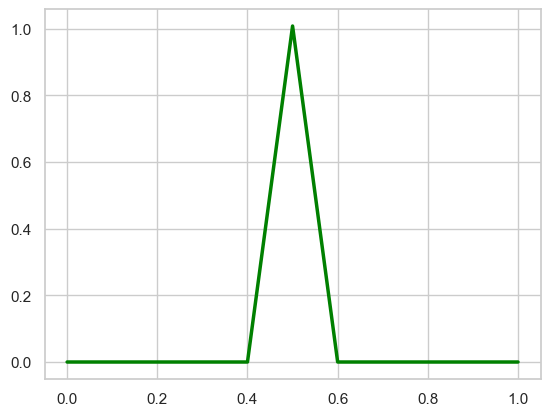

In [11]:
sns.set(style="whitegrid")
sns.lineplot(x=input_doses.numpy(),
             y=output_values.detach().numpy(),
             color='green',
             linewidth=2.5)

plt.show()
